## **Semana 2 do Challange**

Na segunda semana o foco é analisar graficamente os dados, com foco maior na variável Churn (agora chamada de Evasao). Procurar encontrar relações e tendências entre as variáveis, bem como explorar a distribuição dos dados para tentar, visualmente, encontrar perfis de clientes que optaram sair do plano.

**Desafios**
- Analisar a variável target: Churn
- Analisar a distribuição da variável target: Churn
- Criar visualizações relevantes em relação ao Churn
- Analisar a correlação entre as variáveis
- Testar diferentes tipos de gráfico

Importando bibliotecas necessárias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

### Carregamento da Base de Dados
A base de dados será carregada do arquivo CSV gerado na Semana 01 do Challange

In [2]:
df = pd.read_csv('D:\OneDrive\Pessoal\Material de Estudo\ALURA\Desafios\Alura_Challenge_Data_Science\Semana 01\dados limpos.csv')
df.head()

,ID_cliente,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Servico_de_internet,...,Protecao_dipositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_de_contrato,Fatura_online,Metodo_de_pagamento,Total_servico_dia,Total_servico_mes,Total_gasto
0,0002-ORFBO,Nao,Mulher,Nao,Sim,Sim,9,Sim,Nao,DSL,...,Nao,Sim,Sim,Nao,Anual,Sim,Cheque,2.19,65.6,593.30
1,0003-MKNFE,Nao,Homem,Nao,Nao,Nao,9,Sim,Sim,DSL,...,Nao,Nao,Nao,Sim,Mensal,Nao,Cheque,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Homem,Nao,Nao,Nao,4,Sim,Nao,Fiber optic,...,Sim,Nao,Nao,Nao,Mensal,Sim,Cheque eletrônico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Homem,Sim,Sim,Nao,13,Sim,Nao,Fiber optic,...,Sim,Nao,Sim,Sim,Mensal,Sim,Cheque eletrônico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Mulher,Sim,Sim,Nao,3,Sim,Nao,Fiber optic,...,Nao,Sim,Sim,Nao,Mensal,Sim,Cheque,2.80,83.9,267.40


Informações das colunas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_cliente           7043 non-null   object 
 1   Evasao               7043 non-null   object 
 2   Genero               7043 non-null   object 
 3   Cidadao_Senior       7043 non-null   object 
 4   Parceiro             7043 non-null   object 
 5   Dependentes          7043 non-null   object 
 6   Tempo_de_contrato    7043 non-null   int64  
 7   Servico_de_telefone  7043 non-null   object 
 8   Linhas_multiplas     7043 non-null   object 
 9   Servico_de_internet  7043 non-null   object 
 10  Segurnaca_online     7043 non-null   object 
 11  Backup_online        7043 non-null   object 
 12  Protecao_dipositivo  7043 non-null   object 
 13  Suporte_tecnico      7043 non-null   object 
 14  Streaming_TV         7043 non-null   object 
 15  Streaming_filmes     7043 non-null   o

In [4]:
df.columns

Index(['ID_cliente', 'Evasao', 'Genero', 'Cidadao_Senior', 'Parceiro',
       'Dependentes', 'Tempo_de_contrato', 'Servico_de_telefone',
       'Linhas_multiplas', 'Servico_de_internet', 'Segurnaca_online',
       'Backup_online', 'Protecao_dipositivo', 'Suporte_tecnico',
       'Streaming_TV', 'Streaming_filmes', 'Tipo_de_contrato', 'Fatura_online',
       'Metodo_de_pagamento', 'Total_servico_dia', 'Total_servico_mes',
       'Total_gasto'],
      dtype='object')

## Construção dos gráficos

A variável **Evasao** é nosso target, é aquilo que a Alura Voz busca reduzir. Devemos plotar gráficos que nos ajudem a entender a distribuição dessa variável e quais outras variáveis podem estar influenciando a variável **Evasao**

### Distribuição da variável Evasao

Primeiro vamos entender a distribuição dessa variável. Ou seja, qual percentual dos clientes deixaram a empresa e qual permaneceu

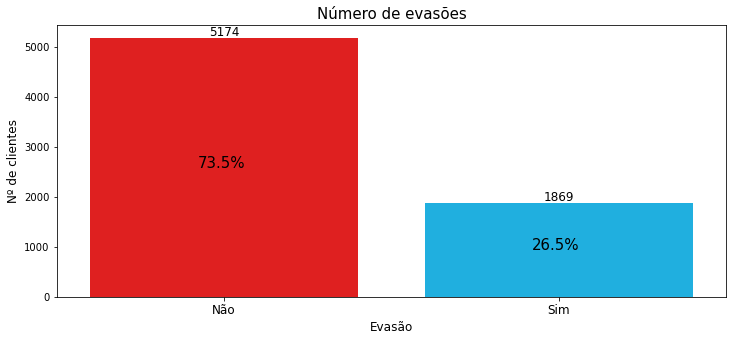

In [5]:
fig, ax = plt.subplots(figsize = (12,5)) # Setando o tamanho do gráfico, onde o primeiro valor representa a largura e o segundo a altura

ax = sns.countplot(data = df, x = 'Evasao', palette = {'deepskyblue', 'red'})

ax.set_title('Número de evasões', fontsize = 15) # Adicionando título e aumentando o tamanho da fonte
ax.set_ylabel('Nº de clientes', fontsize = 12) # Mudando o título do eixo Y e aumentando o tamanho da fonte
ax.set_xlabel('Evasão', fontsize = 12) # Mudando o título do eixo X e aumentando o tamanho da fonte
ax.set_xticklabels(['Não', 'Sim'], fontsize = 12) # Mudando as categorias do eixo X e aumentando o tamanho da fonte

# Adicionando rotúlo de dados do percentual do total
total_registros = len(df['Evasao'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_registros)
    x = p.get_x() + p.get_width()/2 - 0.08
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y),rotation=0, size = 15)

# Adicionando rotúlo de dados do Nº de clientes
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 50,
    '{:1}'.format((height)),
    ha='center', 
    size = 12)

plt.show()

No gráfico é possível perceber uma alto percentual de evasões, o que justifica o pedido de ajuda da Alura Voz na identificação de possíveis causas.

### Evasao X Variáveis categóricas

Aqui vamos comparar a Evasao com variáveis categóricas para tentar identificar possíveis relações

In [6]:
df.Metodo_de_pagamento.unique().tolist()

['Cheque',
 'Cheque eletrônico',
 'Cartão de crédito automático',
 'Transferência bancária automático']

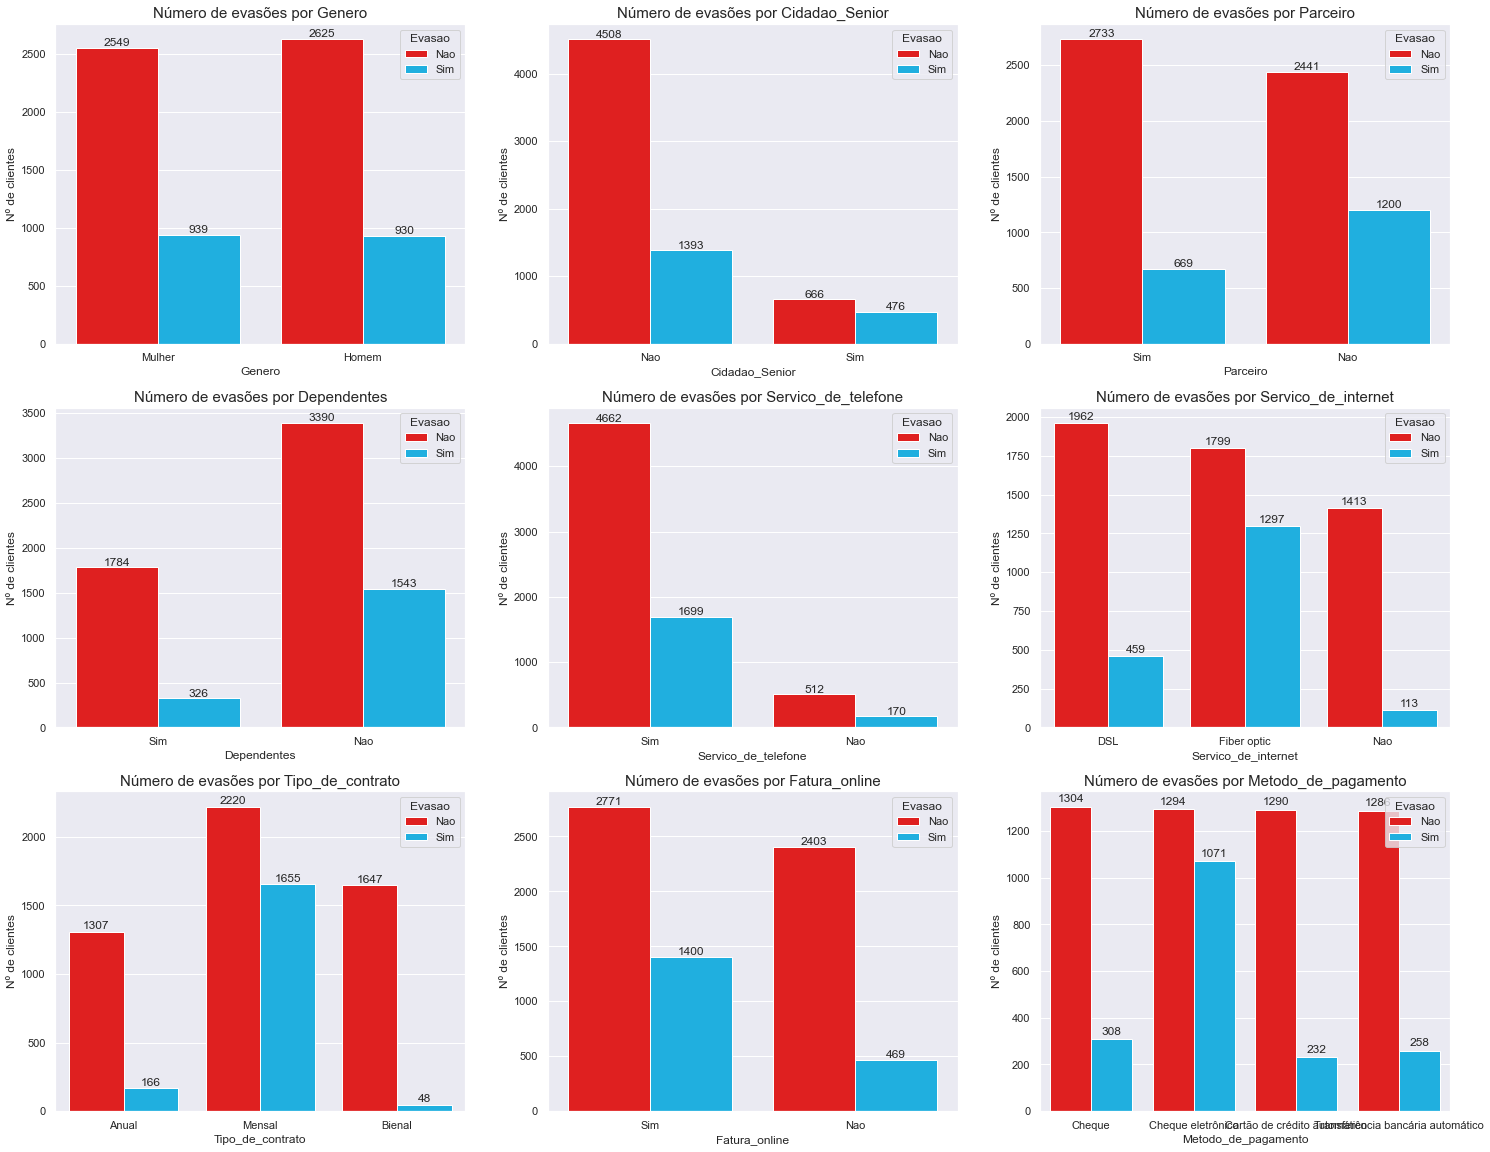

In [28]:
variaveis_categoricas = ['Genero', 'Cidadao_Senior', 'Parceiro',
       'Dependentes', 'Servico_de_telefone', 'Servico_de_internet', 'Tipo_de_contrato', 'Fatura_online',
       'Metodo_de_pagamento',]

lista_variaveis_categoricas = list(enumerate(variaveis_categoricas))

sns.set(rc = {'figure.figsize':(25,20)})

for i in lista_variaveis_categoricas:

    plt.subplot(3, 3,  i[0]+1)
    ax = sns.countplot(data = df, 
                    x = i[1], 
                    hue = 'Evasao',
                    palette = {'deepskyblue', 'red'},
                    )
                    
    ax.set_title(f'Número de evasões por {i[1]}', fontsize = 15) # Adicionando título e aumentando o tamanho da fonte
    ax.set_ylabel('Nº de clientes', fontsize = 12) # Mudando o título do eixo Y e aumentando o tamanho da fonte
    ax.set_xlabel(i[1], fontsize = 12) # Mudando o título do eixo X e aumentando o tamanho da fonte

    # Adicionando rotúlo de dados do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height + 20,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

**Conclusões**
- O Genêro parece não ter muita relação com a Evasão de clientes
- Pessoas acima de 65 anos, ou, sem parceiros, ou, sem dependentes tem uma tendência maior de Evadir
- Ter serviço de telefone não parece ter muita relação com a Evasão de clientes
- Clientes com Serviço de internet de Fibra Optica tem uma tendência alta a evadir, o que pode indicar uma prestação desse serviço de baixa qualidade
- Clientes com contratos mensal tem uma tendência muito maior a evadir se comparado com os outros dois tipos de contrato. Isso pode ser explicado pelo fato de que clientes com pouco tempo de contrato tendem a evadir mais, porém quanto mais o tempo de contrato o cliente tem, menor essa chance fica
- A fatura online parece ter uma relação a evasao, provavelmente pelo fato de ser mais facil cancelar o contrato quando se tem a fatura online.
- Metódo de pagamento por Cheque eletrônico possui uma evasão extremamente alta

### Evasao X Variáveis númericas

Aqui vamos comparar a Evasao com variáveis númericas para tentar identificar possíveis relações

In [ ]:
variaveis_categoricas = ['Genero', 'Cidadao_Senior', 'Parceiro',
       'Dependentes', 'Servico_de_telefone', 'Servico_de_internet', 'Tipo_de_contrato', 'Fatura_online',
       'Metodo_de_pagamento',]

lista_variaveis_categoricas = list(enumerate(variaveis_categoricas))

sns.set(rc = {'figure.figsize':(25,20)})

for i in lista_variaveis_categoricas:

    plt.subplot(3, 3,  i[0]+1)
    ax = sns.countplot(data = df, 
                    x = i[1], 
                    hue = 'Evasao',
                    palette = {'deepskyblue', 'red'},
                    )
                    
    ax.set_title(f'Número de evasões por {i[1]}', fontsize = 15) # Adicionando título e aumentando o tamanho da fonte
    ax.set_ylabel('Nº de clientes', fontsize = 12) # Mudando o título do eixo Y e aumentando o tamanho da fonte
    ax.set_xlabel(i[1], fontsize = 12) # Mudando o título do eixo X e aumentando o tamanho da fonte

    # Adicionando rotúlo de dados do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height + 20,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

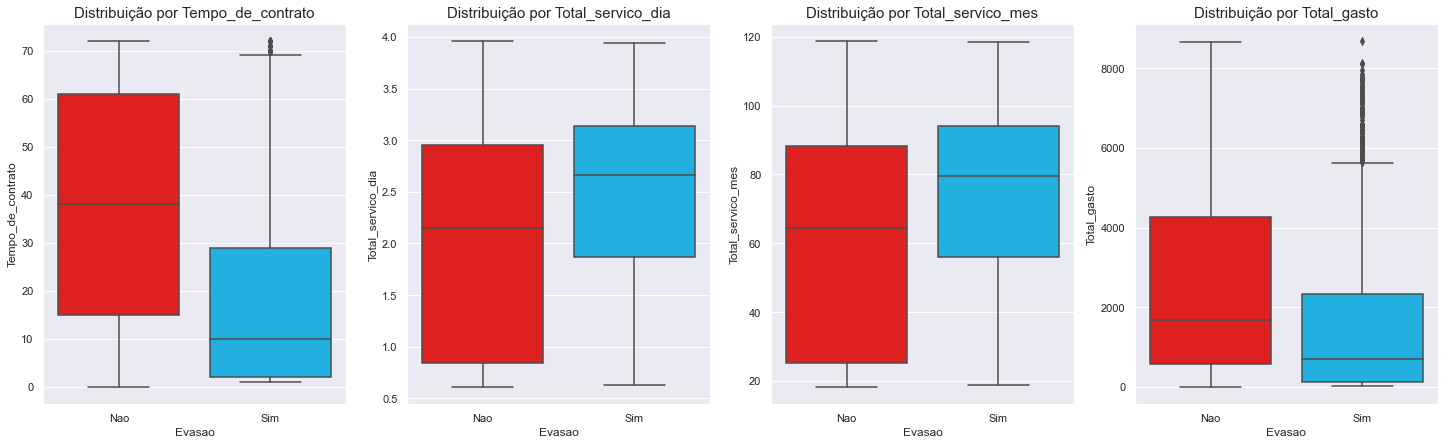

In [36]:
variaveis_numericas = ['Tempo_de_contrato', 'Total_servico_dia', 'Total_servico_mes',
       'Total_gasto']

lista_variaveis_numericas = list(enumerate(variaveis_numericas))

sns.set(rc = {'figure.figsize':(25,7)})

for i in lista_variaveis_numericas:

    plt.subplot(1, 4,  i[0]+1)
    ax_1 = sns.boxplot(data = df, 
                    x = 'Evasao', 
                    y = i[1],
                    palette = {'deepskyblue', 'red'},
                    )
                    
    ax_1.set_title(f'Distribuição por {i[1]}', fontsize = 15)

plt.show()

In [9]:
df.groupby('Evasao')[['Total_servico_dia', 'Total_servico_mes']].mean()

,Total_servico_dia,Total_servico_mes
Evasao,,
Nao,2.04208,61.265124
Sim,2.48145,74.441332


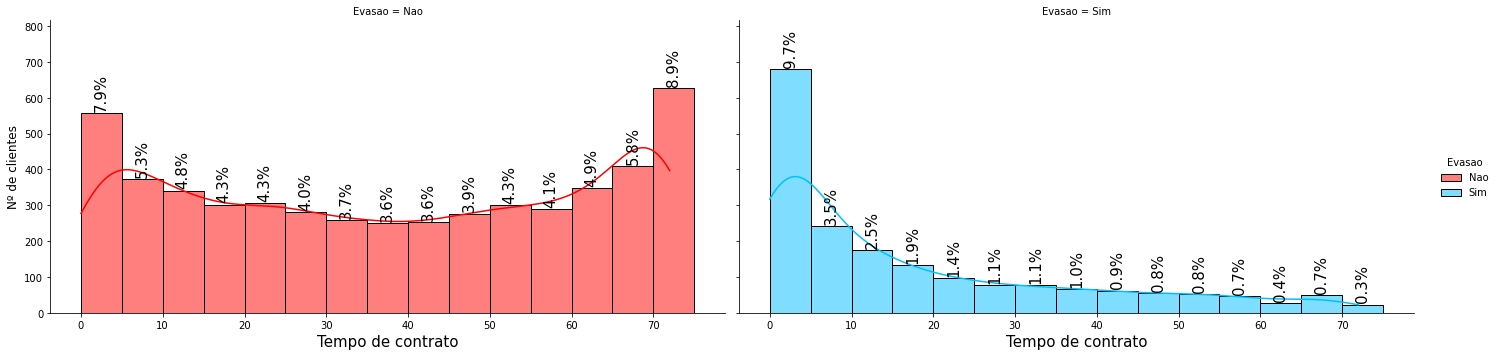

In [10]:
ax = sns.displot(data=df, binwidth=5, x='Tempo_de_contrato', col='Evasao', hue='Evasao', palette = {'Sim' : 'deepskyblue','Nao' : 'red'}, kde = True, aspect = 2)
ax.set_ylabels('Nº de clientes', fontsize = 12) # Mudando o título do eixo Y e aumentando o tamanho da fonte
ax.set_xlabels('Tempo de contrato', fontsize = 12) # Mudando o título do eixo X e aumentando o tamanho da fonte

for ax in ax.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_height()/total_registros*100) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', fontsize=15, rotation=90, padding=2)
        ax.set_xlabel("Tempo de contrato", fontsize = 15) # Mudando o título do eixo X e aumentando o tamanho da fonte
    
    ax.margins(y=0.2)

plt.show()

**Conclusões**
- Clientes com menos tempo de contrato tem maior probabilidade de evadir
- 50 % dos clientes que evadiram o fizeram nos primeiros 10 meses.
- Clientes que evadem normalmente tem uma média de gasto diário e mensal maior do que os que permanecem
- O total gasto é maior para clientes que permanecem, isso se deve pelo fato de que clientes que permanecem irão naturalmente possuir um gasto total maior

### Correlação das Variáveis

Para realizar as correlações tanto dos dados categoricos como dos númericos, irei usar o módulo nominal da biblioteca dython. Esse módulo realiza um cálculo de associações entre os dados categóricos e númericos para determinar a correlação.

In [11]:
# !pip install dython

In [12]:
from dython import nominal

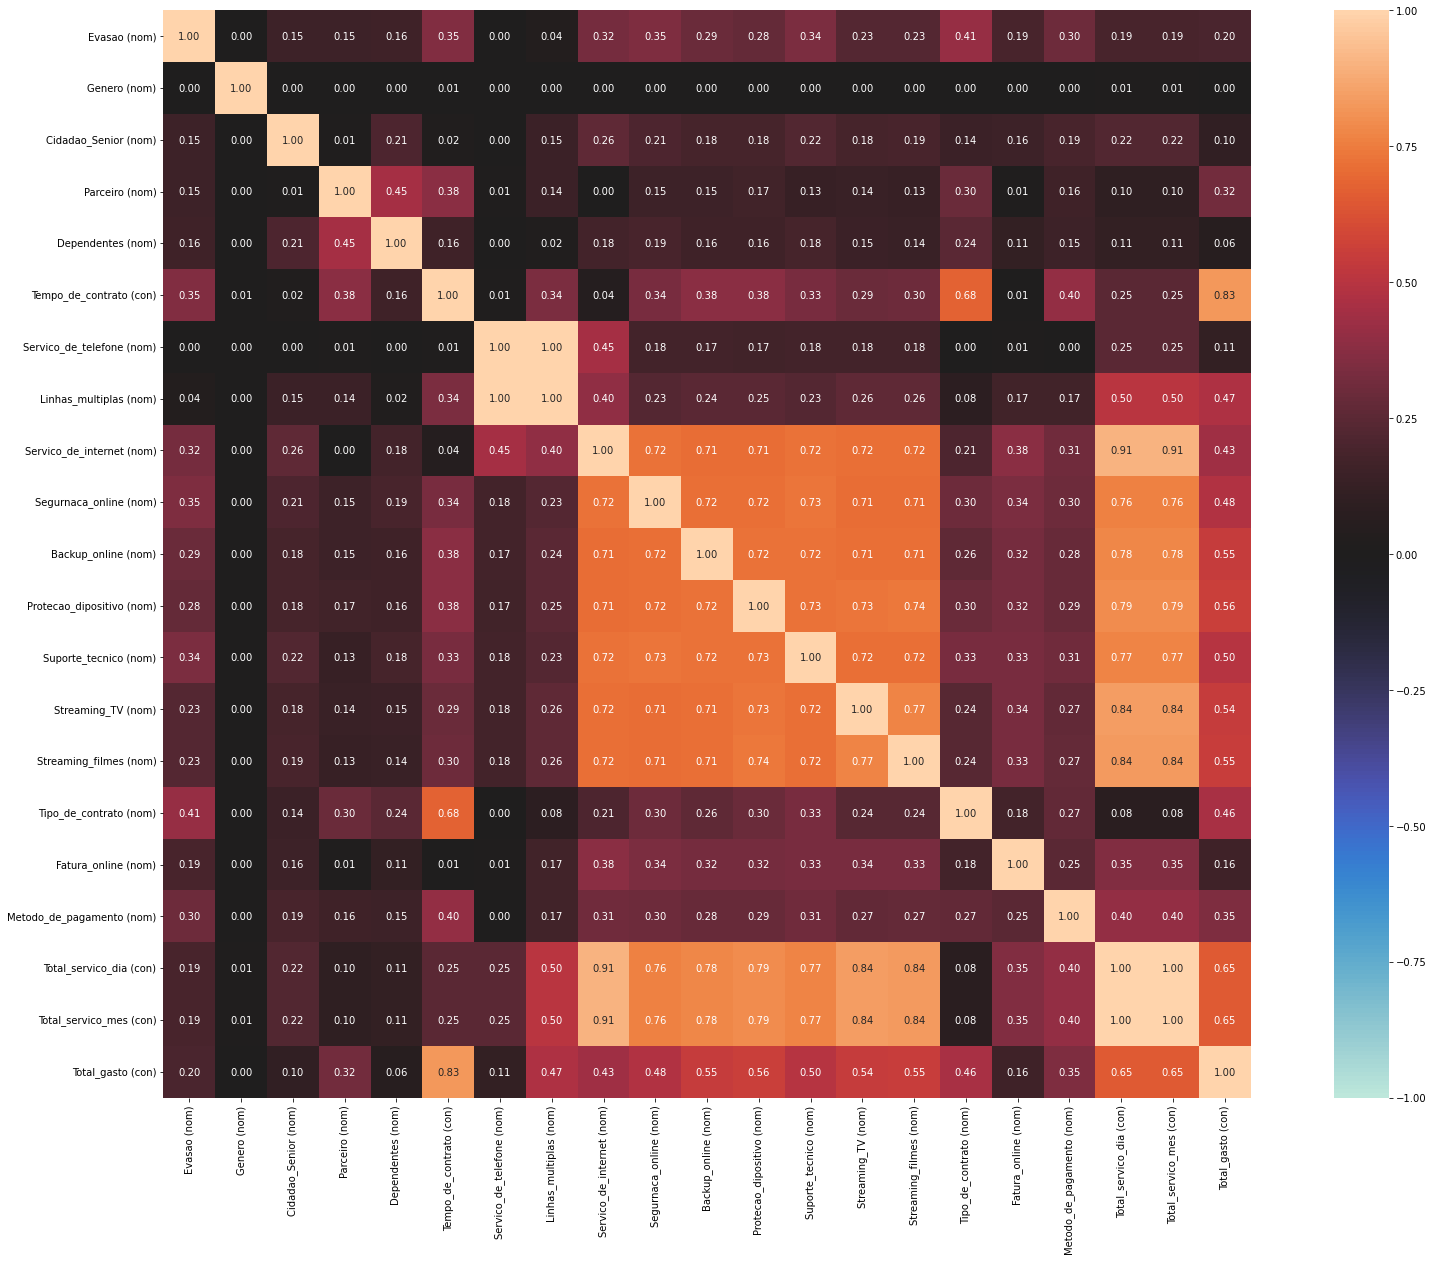

In [13]:
df_sem_id = df.iloc[:,1:]
nominal.associations(df_sem_id,figsize=(30,20),mark_columns=True);

**Conclusões**
- A variável **`Evasao`** possui correlações fracas positivas com as outras variaveis. Dando destaque a: `Tempo_de_contrato`, `Seguranca_online` e `Tipo_de_Contrato`
- Existe uma alta correlação entre os dados que compõem as informações de **`Servico_de_internet`**, como: 
(`Segurnaca_online`, `Backup_online`, `Protecao_dipositivo`, `Suporte_tecnico`,`Streaming_TV`, `Streaming_filmes`)
- Da mesma forma existe uma alta correlação entre **`Servico_de_telefone`** e **`Linhas_multiplas`**, pois a para ter linhas mutiplas é necessário ter serviço de telefone
- **`Servico_de_telefone`** tem uma alta correlação positiva com as variáveis de **`Total_servico_dia`** e **`Total_servico_mes`**

### Explorando a biblioteca Plotly

Aqui estão alguns gráficos feitos com a biblioteca plotly

In [14]:
import plotly.express as px

In [15]:
px.histogram(df, x ='Evasao', title = 'Contagem de Evasões', template = 'simple_white', text_auto=True, color = 'Evasao',  
                color_discrete_map={"Nao": "blue", "Sim": "red"},
                )

In [16]:
fig = px.pie(df, names='Evasao', title='Percentual de Evasões')
fig.show()  

In [17]:
fig = px.box(df, y="Tempo_de_contrato", x = 'Evasao', color = 'Evasao')
fig.show()